In [1]:
# magic command to display matplotlib plots inline within the ipython notebook webpage
%matplotlib inline

# import necessary modules
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import matplotlib.cm as cm, matplotlib.font_manager as fm

In [4]:
# load the gps coordinate data, using the date as the full set's index
# the data files are encoded as utf-8: specify so to prevent matplotlib from choking on diacritics
df = pd.read_csv(r'C:\Users\yangw\PTUA2022\Lab06\data\summer-travel-gps-full.csv', encoding='utf-8', index_col='date', parse_dates=True)
rs = pd.read_csv(r'C:\Users\yangw\PTUA2022\Lab06\data\summer-travel-gps-dbscan.csv',encoding='utf-8')

In [5]:
df.head()

,lat,lon,city,country
date,,,,
2014-05-14 09:07:00,51.481292,-0.451011,West Drayton,United Kingdom
2014-05-14 09:22:00,51.474005,-0.450999,Hounslow,United Kingdom
2014-05-14 10:51:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:24:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:38:00,51.474146,-0.451562,Hounslow,United Kingdom


In [6]:
rs.head()

,lat,lon,date,city,country
0,51.478199,-0.446081,05/14/2014 10:51,Hounslow,United Kingdom
1,38.781775,-9.137544,05/14/2014 15:11,Lisbon,Portugal
2,38.771939,-9.128911,05/14/2014 15:41,Lisbon,Portugal
3,38.742987,-9.147780,05/14/2014 16:11,Lisbon,Portugal
4,38.693780,-9.206363,05/15/2014 14:19,Lisbon,Portugal


(1750, 5)
(158, 6)
(1750, 5)
(158, 6)


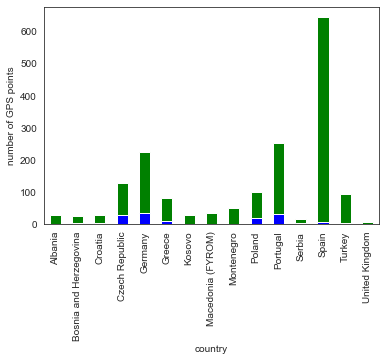

In [72]:
# Q1: Can you draw a bar chart for the country by using matplotlib and seaborn? You can use the df dataframe.
# Please style the chart to make it look nicer
# such as figsize, width, alpha, color, edgecolor, grid, xlim, and ylim
rs['date']=pd.to_datetime(rs['date'])

print(df.shape)
print(rs.shape)
df.drop_duplicates(inplace=True)
rs.drop_duplicates(inplace=True)
print(df.shape)
print(rs.shape)
df['old_ind'] = range(0, len(df))
rs['old_ind'] = range(0, len(rs))



ax = plt.subplot(111)
raw_count=df.groupby('country')['old_ind'].count()
ax=raw_count.plot(kind='bar',color='g',label='raw GPS')
DBSCAN_count=rs.groupby('country')['old_ind'].count()
DBSCAN_count.plot(kind='bar',color='b',label='DBSCAN',ax=ax)

ax.set_ylabel('number of GPS points')
plt.show()

In [74]:
raw_count=df.groupby('country')['old_ind'].count().reset_index()
raw_count.columns=['country','raw GPS']
print(raw_count)

DBSCAN_count=rs.groupby('country')['old_ind'].count().reset_index()
DBSCAN_count.columns=['country','DBSCAN GPS']
print(DBSCAN_count)

country_plot=pd.merge(raw_count,DBSCAN_count,on='country',how='outer')
country_plot.fillna(0, inplace=True)

country_plot.set_index('country',inplace=True)
print(country_plot)
country_plot.plot(x="country", y=["raw GPS", "DBSCAN GPS"], kind="bar",figsize=(9,8))
plt.show()




                   country  raw GPS
0                  Albania       28
1   Bosnia and Herzegovina       26
2                  Croatia       30
3           Czech Republic      129
4                  Germany      225
5                   Greece       82
6                   Kosovo       30
7        Macedonia (FYROM)       34
8               Montenegro       51
9                   Poland      102
10                Portugal      254
11                  Serbia       15
12                   Spain      644
13                  Turkey       94
14          United Kingdom        6
                   country  DBSCAN GPS
0                  Albania           2
1   Bosnia and Herzegovina           4
2                  Croatia           3
3           Czech Republic          30
4                  Germany          36
5                   Greece          11
6                   Kosovo           1
7        Macedonia (FYROM)           1
8               Montenegro           1
9                   Poland        

KeyError: 'country'

                   country  GPS kind
0                  Albania   28  raw
1   Bosnia and Herzegovina   26  raw
2                  Croatia   30  raw
3           Czech Republic  129  raw
4                  Germany  225  raw
5                   Greece   82  raw
6                   Kosovo   30  raw
7        Macedonia (FYROM)   34  raw
8               Montenegro   51  raw
9                   Poland  102  raw
10                Portugal  254  raw
11                  Serbia   15  raw
12                   Spain  644  raw
13                  Turkey   94  raw
14          United Kingdom    6  raw
                   country  GPS    kind
0                  Albania    2  DBSCAN
1   Bosnia and Herzegovina    4  DBSCAN
2                  Croatia    3  DBSCAN
3           Czech Republic   30  DBSCAN
4                  Germany   36  DBSCAN
5                   Greece   11  DBSCAN
6                   Kosovo    1  DBSCAN
7        Macedonia (FYROM)    1  DBSCAN
8               Montenegro    1  DBSCAN
9       

C:\Users\yangw\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\yangw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1080x576 with 0 Axes>

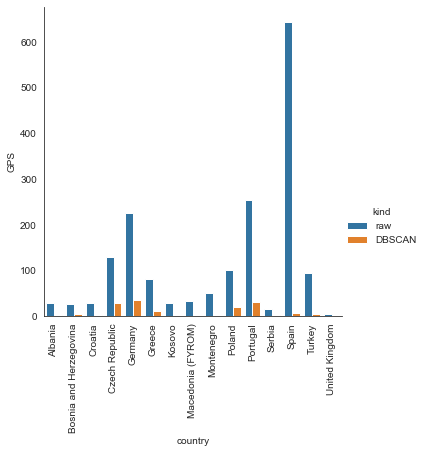

In [68]:
import seaborn as sns
sns.set_style('white')

raw_count=df.groupby('country')['old_ind'].count().reset_index()
raw_count.columns=['country','GPS']
raw_count['kind']='raw'
print(raw_count)

rs_count=rs.groupby('country')['old_ind'].count().reset_index()
rs_count.columns=['country','GPS']
rs_count['kind']='DBSCAN'
print(rs_count)

country_plot=pd.concat([raw_count,rs_count],ignore_index=True)#,on='country',how='outer')
country_plot.fillna(0, inplace=True)
print(country_plot)

plt.figure(figsize = (15,8))

ax=sns.factorplot("country", "GPS", hue='kind', data=country_plot, kind="bar")#col="class",
plt.xticks(rotation=90)

plt.show()

                      city  raw GPS
0    Algueirão-Mem Martins        1
1               Alpirsbach        1
2                  Amadora        1
3                  Ansbach        1
4                   Athens       67
..                     ...      ...
108                 Zendek        1
109               Zibreira        1
110        Ústí nad Orlicí        1
111                  Úvaly        1
112             Český Brod        1

[113 rows x 2 columns]
                      city  DBSCAN GPS
0    Algueirão-Mem Martins           1
1               Alpirsbach           1
2                  Amadora           1
3                  Ansbach           1
4                   Athens           2
..                     ...         ...
98                  Zendek           1
99                Zibreira           1
100        Ústí nad Orlicí           1
101                  Úvaly           1
102             Český Brod           1

[103 rows x 2 columns]
         city  raw GPS  DBSCAN GPS
10  Barcelona    

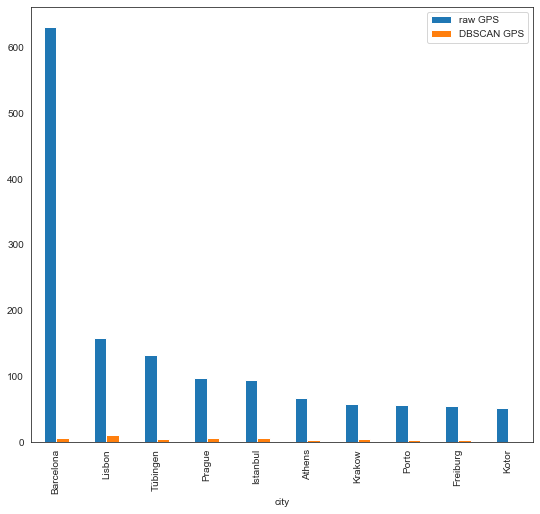

In [85]:
# Q2: Draw the same bar chart, but now for the most visited cities instead of countries
raw_count=df.groupby('city')['old_ind'].count().reset_index()
raw_count.columns=['city','raw GPS']
print(raw_count)

DBSCAN_count=rs.groupby('city')['old_ind'].count().reset_index()
DBSCAN_count.columns=['city','DBSCAN GPS']
print(DBSCAN_count)

country_plot=pd.merge(raw_count,DBSCAN_count,on='city',how='outer')
country_plot.fillna(0, inplace=True)
country_plot.sort_values(['raw GPS','DBSCAN GPS'],inplace=True,ascending=False)
country_plot=country_plot.head(10)

print(country_plot)
country_plot.plot(x="city", y=["raw GPS", "DBSCAN GPS"], kind="bar",figsize=(9,8))
# plt.ylim(0,100)
plt.show()


         lat       lon                date      city         country  old_ind
0  51.478199 -0.446081 2014-05-14 10:51:00  Hounslow  United Kingdom        0
1  38.781775 -9.137544 2014-05-14 15:11:00    Lisbon        Portugal        1
2  38.771939 -9.128911 2014-05-14 15:41:00    Lisbon        Portugal        2
3  38.742987 -9.147780 2014-05-14 16:11:00    Lisbon        Portugal        3
4  38.693780 -9.206363 2014-05-15 14:19:00    Lisbon        Portugal        4
(158, 6)
                           lat       lon          city         country  \
date                                                                     
2014-05-14 09:07:00  51.481292 -0.451011  West Drayton  United Kingdom   
2014-05-14 09:22:00  51.474005 -0.450999      Hounslow  United Kingdom   
2014-05-14 10:51:00  51.478199 -0.446081      Hounslow  United Kingdom   
2014-05-14 11:38:00  51.474146 -0.451562      Hounslow  United Kingdom   
2014-05-14 12:23:00  51.480146 -0.441103      Hounslow  United Kingdom   

    

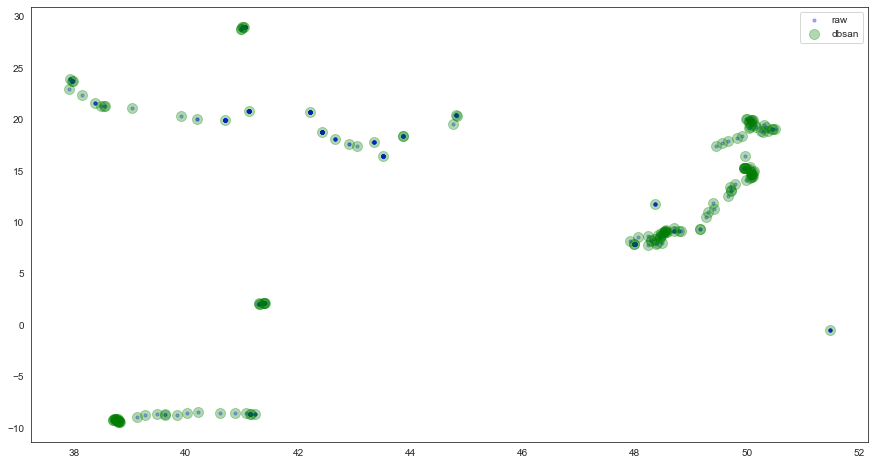

In [129]:
# Q3: Draw a scatter plot the longitude and latitude data, with matplotlib and seaborn defaults. 
# You can use the rs dataframe.
# Please style the chart to make it look nicer with good size and alpha settings. 

rs.sort_values('date',ascending=True,inplace=True)
print(rs.head())
print(rs.shape)

df.sort_index(ascending=True,inplace=True)
print(df.head())
print(df.shape)

plt.figure(figsize = (15,8))
ax = plt.subplot(111)

x=rs['lat'].tolist()
y=rs['lon'].tolist()

x2=df['lat']
y2=df['lon']

# print(x)
print(len(x2),len(y2))

plt.scatter(x2, y2,c='b', s=10, alpha=0.3,label='raw')#,markersize=15,label='DBSCAN')

plt.scatter(x, y,c='g', s=100, alpha=0.3,label='dbsan')#,markersize=15,label='DBSCAN')
plt.legend()
plt.show()

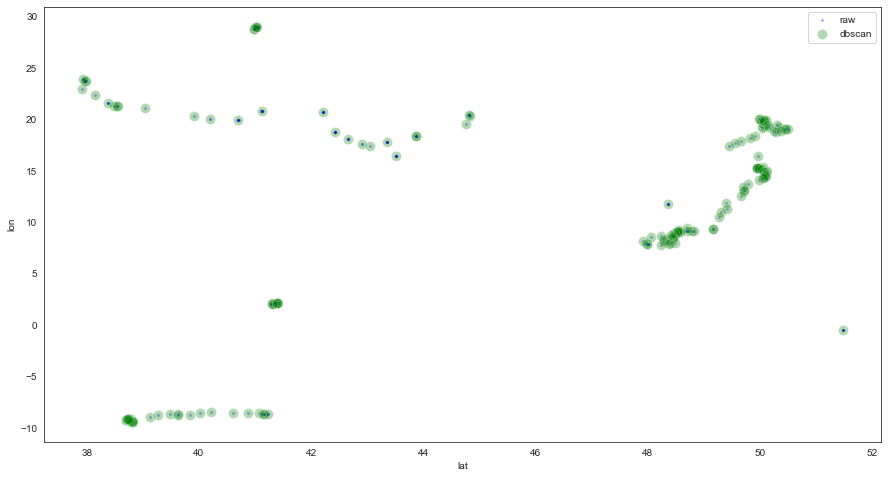

In [135]:
##seaborn
plt.figure(figsize = (15,8))
ax = plt.subplot(111)
sns.scatterplot(data = df, x = "lat", y = "lon",ax=ax,color='b', s=10, alpha=0.3,label='raw')
sns.scatterplot(data = rs, x = "lat", y = "lon",ax=ax,color='g', s=100, alpha=0.3,label='dbscan')

plt.show()


          date  gps  dbscan
0   2014-05-14   35       4
1   2014-05-15   61       2
2   2014-05-16   57      11
3   2014-05-17   63      13
4   2014-05-18   49       5
5   2014-05-20   36       1
6   2014-05-30   20       6
7   2014-05-31   29       6
8   2014-06-01   42       2
9   2014-06-02   39      16
10  2014-06-03   29       1
11  2014-06-04   31      12
12  2014-06-05   31       1
13  2014-06-06   35      18
14  2014-06-09   41       4
15  2014-06-10   45      13
16  2014-06-12   32       8
17  2014-06-16   54       1
18  2014-06-18   64       1
19  2014-06-20   17       1
20  2014-06-21   13       2
21  2014-06-22   10       1
22  2014-06-23   12       2
23  2014-06-24   14       3
24  2014-06-26    8       2
25  2014-06-28   38       1
26  2014-06-30   14       1
27  2014-07-01    8       1
28  2014-07-03   17       1
29  2014-07-04   14       3
30  2014-07-05   51       7
31  2014-07-06   40       5
32  2014-07-07   43       1
33  2014-07-08   35       1
34  2014-07-09   11 

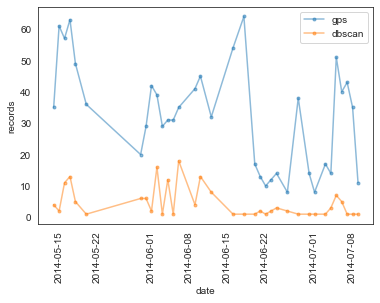

In [157]:
# Q4: Draw a  matplotlib and seaborn line chart from countdata. 
# Please style the chart to make it look nicer with good size and alpha setting
# get the count of records by date
countdata = df.groupby(df.index.date).size().reset_index()
countdata.head()
countdata.columns=['date','gps']

countdata_rs = rs.groupby(rs['date'].dt.date).size().reset_index()
countdata_rs.head()
countdata_rs.columns=['date','dbscan']

# plt.figure(figsize = (15,8))
# ax = plt.subplot(111)

# ax.plot(countdata.date,countdata.gps,label='raw')
# ax.plot(countdata_rs.date,countdata_rs.dbscan,label='dbscan')
# plt.legend()
# plt.show()

count_merge=pd.merge(countdata, countdata_rs,on='date')
print(count_merge)
count_merge.set_index('date',inplace=True)

cols_plot = ['gps', 'dbscan']
axes = count_merge[cols_plot].plot(marker='.', alpha=0.5, linestyle='-')
plt.xticks(rotation=90)
plt.ylabel('records')
plt.show()


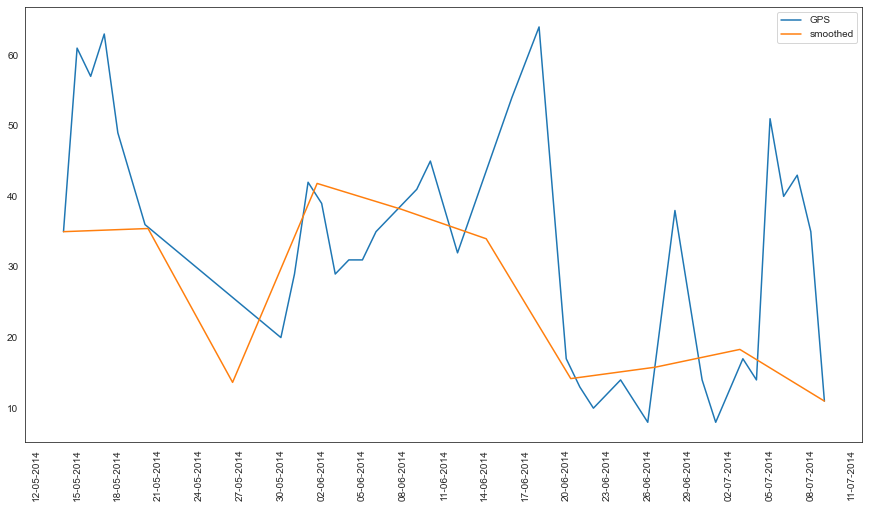

In [180]:
# Q5: Now you try: re-create the plot above with different line widths, colors, and point markers. 
# Play with moving the annotation labels around. Make the vertical tick marks 3 days apart instead of 5.
# experiment with a more advanced challenge like smoothing the line:
# - https://stackoverflow.com/questions/5283649/plot-smooth-line-with-pyplot
# - https://stackoverflow.com/questions/25825946/generating-smooth-line

from scipy.interpolate import make_interp_spline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from datetime import datetime
import matplotlib.dates as mdates


count_merge=pd.merge(countdata, countdata_rs,on='date')
count_merge['date']=pd.to_datetime(count_merge['date'])
count_merge.set_index('date',inplace=True)
# print(count_merge)
# print(count_merge.index.dtype)

# smooth
date_np=np.array(count_merge.index.tolist())
value_np=np.array(count_merge['gps'].tolist())
date_num=dates.date2num(date_np)

date_num_smooth = np.linspace(date_num.min(), date_num.max(0), 10) 
spl = make_interp_spline(date_num, value_np, k=3)
value_np_smooth = spl(date_num_smooth)

# print
plt.figure(figsize = (15,8))
ax = plt.subplot(111)
ax.plot(date_np, value_np,label='GPS')
ax.plot(dates.num2date(date_num_smooth), value_np_smooth,label='smoothed')


ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))

plt.legend()
plt.xticks(rotation=90)
plt.show()

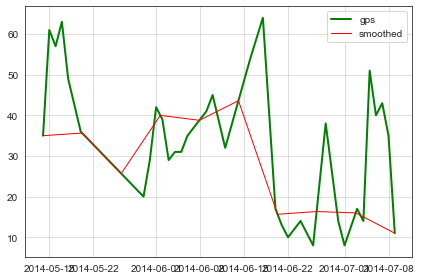

In [202]:
import matplotlib.pyplot as plt
import time
import matplotlib.dates as dates

import numpy as np
from scipy.interpolate import interp1d

count_merge=pd.merge(countdata, countdata_rs,on='date')
count_merge['date']=pd.to_datetime(count_merge['date'])
count_merge.set_index('date',inplace=True)
# print(count_merge)
# print(count_merge.index.dtype)


x_sm = np.array(count_merge.index.tolist())
date_num_x_sm=dates.date2num(x_sm)
y_sm = np.array(count_merge.gps.tolist())

x_smooth = np.linspace(date_num_x_sm.min(), date_num_x_sm.max(), 10)
temp = interp1d(date_num_x_sm,y_sm)
y_smooth=temp(x_smooth)

# # Define the matrix of 1x1 to place subplots
# # Placing the plot1 on 1x1 matrix, at pos 1
# Create a canvas to place the subgraphs
canvas = plt.figure()


sp1 = canvas.add_subplot(1,1,1)
sp1.plot(x_sm, y_sm, 'g', linewidth=2,label='gps')
sp1.plot(x_smooth, y_smooth, 'red', linewidth=1,label='smoothed')


# Show the plot/image
plt.tight_layout()
plt.legend()
plt.grid(alpha=0.8)
plt.show()

113


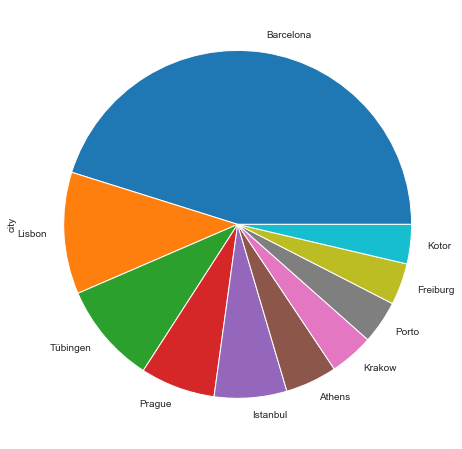

In [213]:
cities = df['city'].value_counts()
print(cities.count())
cities.head()

# Q6: draw a pie chart for cities.
# Please style the chart to make it look nicer.
plt.figure(figsize = (15,8))

ax=cities.head(10).plot(kind='pie')
# plt.tight_layout()
plt.show()